<h1>EECS 4412B F24 Assignment 3</center></h1>

## Hashir Jamil - 217 452 954
## Daniel Di Giovanni - 218 204 818
#### Friday, December 20, 2024

<h1><center>Coding Questions (15 Marks)</center></h1>

### Question 1 (Coding): K-Means Clustering (6 Marks)

Load the Iris dataset using sklearn.datasets.load_iris. For simplicity, use only the first two
features (sepal length and sepal width). Visualize the dataset as a scatter plot.

Tasks:
* Apply the K-Means algorithm to cluster the data with K=3.
* Plot the resulting clusters and centroids.
* Discuss the limitations of K-Means, particularly with this dataset.

In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

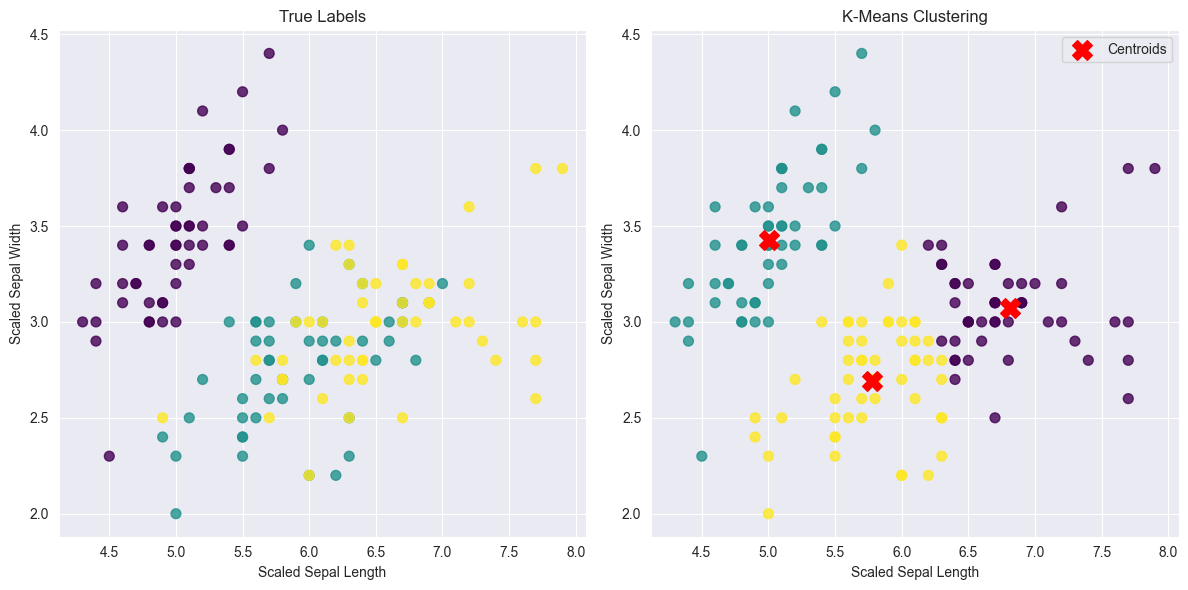

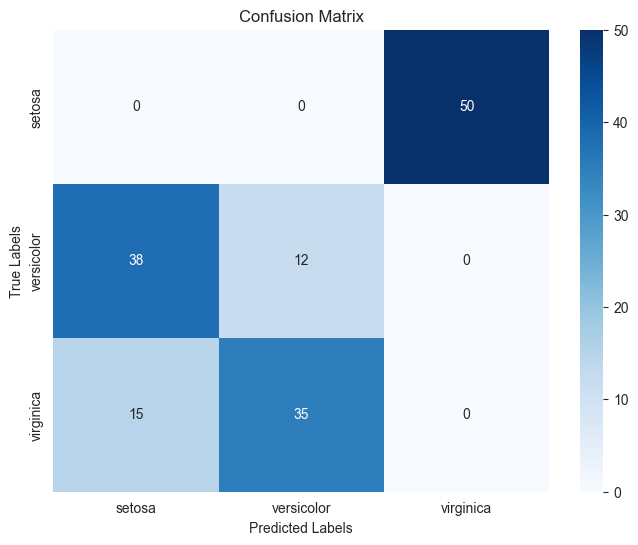

Accuracy (after alignment): 0.10
Adjusted Rand Index (ARI): 0.60
Homogeneity Score (K-Means): 0.6463579841342949
Confusion Matrix:
 [[ 0  0 50]
 [38 12  0]
 [15 35  0]]


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score, homogeneity_score
from scipy.optimize import linear_sum_assignment

# Load Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Extract sepal length and sepal width features
sepal_length = data.iloc[:, 0].values
sepal_width = data.iloc[:, 1].values
X = np.column_stack((sepal_length, sepal_width))
Y = iris.target

# Apply K-Means clustering on scaled data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Get cluster labels and centroids
kmeans_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Align cluster labels with true labels using the Hungarian Algorithm
conf_matrix = confusion_matrix(Y, kmeans_labels)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
aligned_labels = kmeans_labels.copy()

for cluster, target in enumerate(col_ind):
    aligned_labels[kmeans_labels == cluster] = target

# Plot the true labels
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=50, alpha=0.8)
plt.title("True Labels")
plt.xlabel("Scaled Sepal Length")
plt.ylabel("Scaled Sepal Width")

# Plot the K-Means clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=aligned_labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Scaled Sepal Length")
plt.ylabel("Scaled Sepal Width")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# Calculate accuracy and other metrics
accuracy = accuracy_score(Y, aligned_labels)
ari = adjusted_rand_score(Y, kmeans_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(f"Accuracy (after alignment): {accuracy:.2f}")
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print("Homogeneity Score (K-Means):", homogeneity_score(Y, kmeans_labels))
print("Confusion Matrix:\n", conf_matrix)

#### Limitations of K-Means

1. Sensitivity to Initial Centroids
    * K-Means randomly initializes the centroids at the start of the algorithm. This randomness can lead to different results depending on the initial placement of centroids. If the initial centroids are not well-chosen, K-Means can converge to a suboptimal solution, potentially causing poor clustering performance.  


2. Assumption of Spherical Clusters
    * K-Means assumes that clusters are spherical (i.e., they have a uniform size and shape). It works well when clusters are circular or ellipsoid in shape but struggles when clusters are of different shapes or densities.  


3. Fixed Number of Clusters (K)
    * K-Means requires the number of clusters KK to be specified beforehand. Choosing the correct KK is critical, and selecting an incorrect value can lead to poor clustering.  
    

4. Sensitivity to Feature Scaling
    * K-Means is sensitive to the scale of the features. Since it relies on Euclidean distance to assign points to clusters, features with larger scales will dominate the distance calculations.  


5. Difficulty with Outliers
    * K-Means can be sensitive to outliers. Since K-Means assigns every point to a cluster, outliers can heavily influence the centroids, leading to distorted cluster centers.  


6. Hard Assignment of Points
    * K-Means assigns each point to exactly one cluster. This is a hard assignment, which means points on the boundary of two clusters can be assigned to only one of the clusters, potentially causing them to be misclassified.  


7. Poor Performance with Non-Convex Clusters
    * K-Means assumes that the clusters are convex, meaning they can be grouped into simple geometric shapes (e.g., circles, ellipses). It does not work well when clusters have complex or non-convex shapes.  

### Question 2 (Coding): DBSCAN on Iris Dataset (6 Marks)

We used the same data (iris data) for this question. Similar to the previous question, use only the
first two features (sepal length and sepal width) for simplicity.

Tasks:
* Apply the DBSCAN algorithm to the dataset (eps = 0.5, min_samples = 5) and plot the
clustering results as a scatter plot.
* Briefly explain how eps and min_samples influence the results.

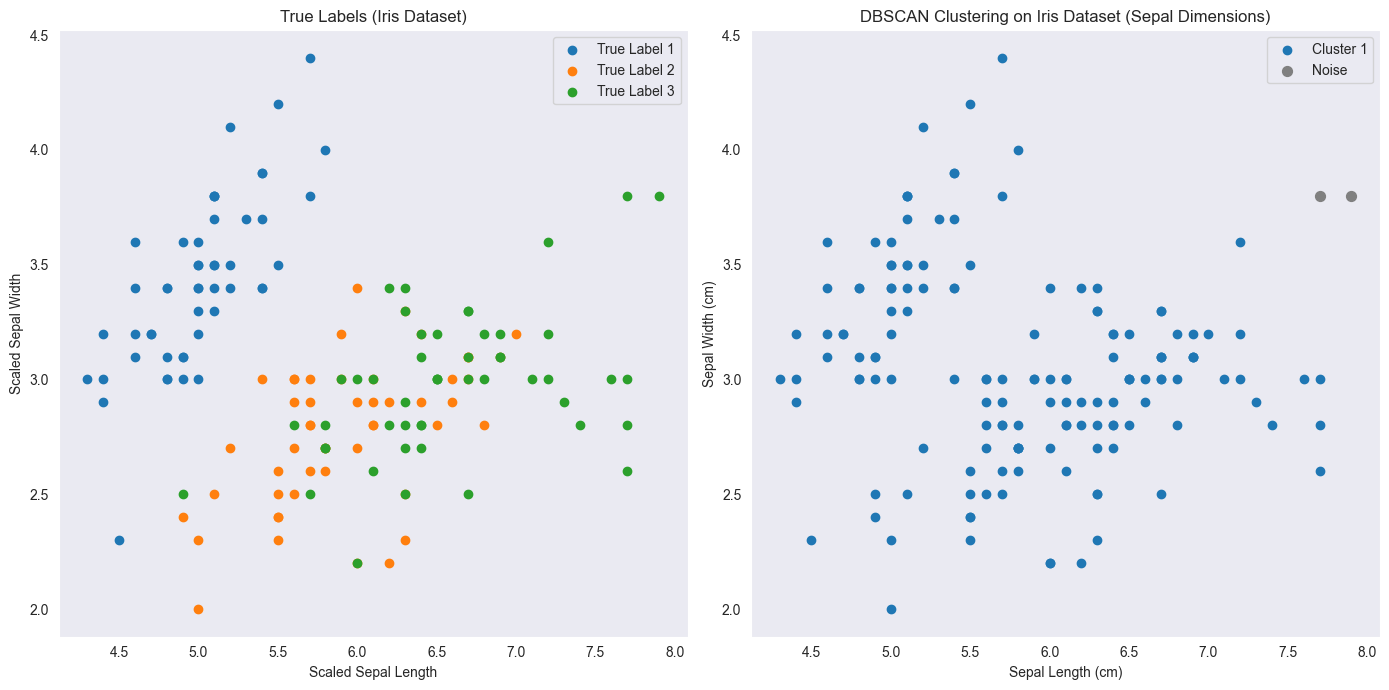

Number of noise points: 2


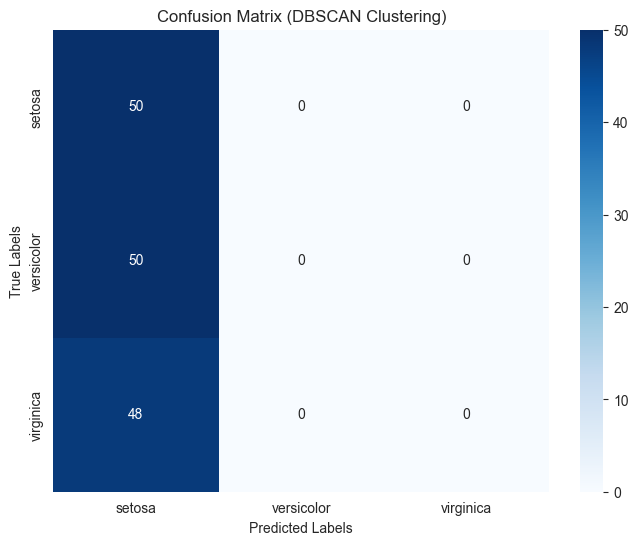

Accuracy (after alignment): 0.33
Adjusted Rand Index (ARI): 0.00
Homogeneity Score (DBSCAN): 0.01349809435330131
Confusion Matrix:
 [[50  0  0]
 [50  0  0]
 [48  0  0]]


In [38]:
# Load Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Extract sepal length and sepal width features
sepal_length = data.iloc[:, 0].values
sepal_width = data.iloc[:, 1].values
X = np.column_stack((sepal_length, sepal_width))
Y = iris.target

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Handle noise (points labeled as -1 are considered noise)
noise_count = list(dbscan_labels).count(-1)

# Include all known labels in the confusion matrix
all_labels = np.unique(np.concatenate((Y, dbscan_labels[dbscan_labels != -1])))
conf_matrix = confusion_matrix(Y, dbscan_labels, labels=all_labels)

# Align DBSCAN labels with true labels using Hungarian Algorithm
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
aligned_labels = dbscan_labels.copy()

for cluster, target in enumerate(col_ind):
    aligned_labels[dbscan_labels == cluster] = target

# Create two subplots to compare true labels and DBSCAN clustering results
plt.figure(figsize=(14, 7))

# Plot for true labels
plt.subplot(1, 2, 1)
for label in set(Y):
    plt.scatter(X[Y == label, 0], X[Y == label, 1], label=f'True Label {label + 1}')
plt.title("True Labels (Iris Dataset)")
plt.xlabel("Scaled Sepal Length")
plt.ylabel("Scaled Sepal Width")
plt.legend()
plt.grid()

# Plot for DBSCAN clustering results
plt.subplot(1, 2, 2)
unique_labels = set(dbscan_labels)
for label in unique_labels:
    if label == -1:
        # Noise points
        plt.scatter(X[dbscan_labels == label, 0], X[dbscan_labels == label, 1], c='gray', label='Noise', s=50)
    else:
        # Cluster points
        plt.scatter(X[dbscan_labels == label, 0], X[dbscan_labels == label, 1], label=f'Cluster {label + 1}')

plt.title('DBSCAN Clustering on Iris Dataset (Sepal Dimensions)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Calculate accuracy and other metrics
accuracy = accuracy_score(Y, aligned_labels)
ari = adjusted_rand_score(Y, dbscan_labels)

print(f"Number of noise points: {noise_count}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix (DBSCAN Clustering)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(f"Accuracy (after alignment): {accuracy:.2f}")
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print("Homogeneity Score (DBSCAN):", homogeneity_score(Y, dbscan_labels))
print("Confusion Matrix:\n", conf_matrix)

In [39]:
# Compare with the true labels
print("Adjusted Rand Index (K-Means):", adjusted_rand_score(Y, kmeans_labels))
print("Homogeneity Score (K-Means):", homogeneity_score(Y, kmeans_labels))

print("Adjusted Rand Index (DBSCAN):", adjusted_rand_score(Y, dbscan_labels))
print("Homogeneity Score (DBSCAN):", homogeneity_score(Y, dbscan_labels))

Adjusted Rand Index (K-Means): 0.6006861021484542
Homogeneity Score (K-Means): 0.6463579841342949
Adjusted Rand Index (DBSCAN): 0.00036284338590934
Homogeneity Score (DBSCAN): 0.01349809435330131


As shown in the plot above, only one cluster was found with DBSCAN clustering with the parameters $eps=0.5$ and $min\_samples = 5$. However, when we change the parameters to $eps=0.15$ and $min\_samples = 4$, we get three clusters, similar to the K-Means results, plus some data points identified as noise.

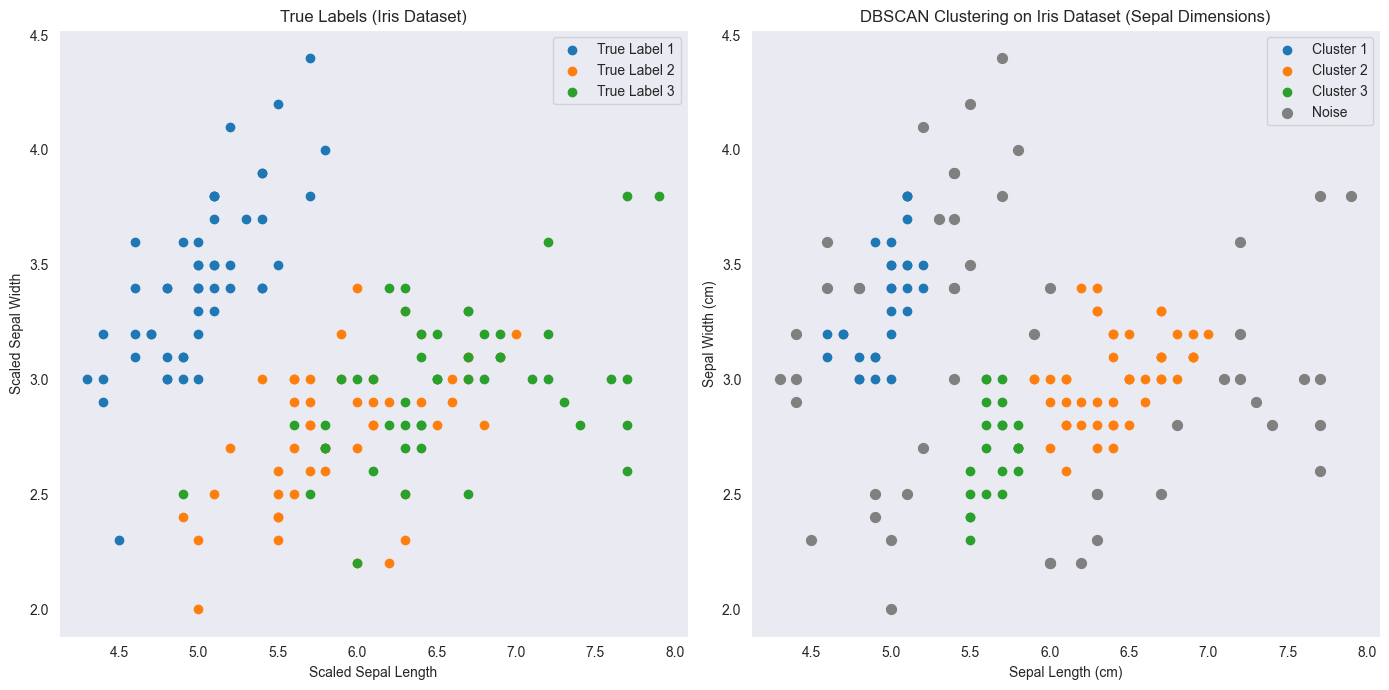

Number of noise points: 50


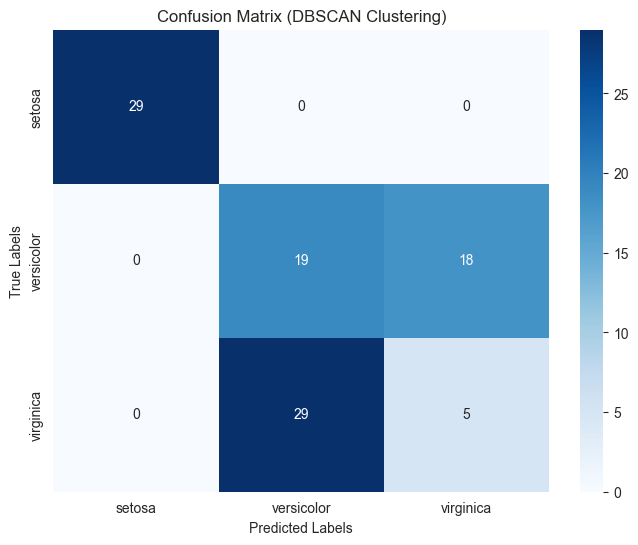

Accuracy (after alignment): 0.51
Adjusted Rand Index (ARI): 0.24
Homogeneity Score: 0.01349809435330131
Confusion Matrix:
 [[29  0  0]
 [ 0 19 18]
 [ 0 29  5]]


In [40]:
# Load Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Extract sepal length and sepal width features
sepal_length = data.iloc[:, 0].values
sepal_width = data.iloc[:, 1].values
X = np.column_stack((sepal_length, sepal_width))
Y = iris.target

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.15, min_samples=4)
labels = dbscan.fit_predict(X)

# Handle noise (points labeled as -1 are considered noise)
noise_count = list(labels).count(-1)

# Include all known labels in the confusion matrix
all_labels = np.unique(np.concatenate((Y, labels[labels != -1])))
conf_matrix = confusion_matrix(Y, labels, labels=all_labels)

# Align DBSCAN labels with true labels using Hungarian Algorithm
aligned_labels = labels.copy()
row_ind, col_ind = linear_sum_assignment(-conf_matrix)

for cluster, target in enumerate(col_ind):
    aligned_labels[labels == cluster] = target

# Create two subplots to compare true labels and DBSCAN clustering results
plt.figure(figsize=(14, 7))

# Plot for true labels
plt.subplot(1, 2, 1)
for label in set(Y):
    plt.scatter(X[Y == label, 0], X[Y == label, 1], label=f'True Label {label + 1}')
plt.title("True Labels (Iris Dataset)")
plt.xlabel("Scaled Sepal Length")
plt.ylabel("Scaled Sepal Width")
plt.legend()
plt.grid()

# Plot for DBSCAN clustering results
plt.subplot(1, 2, 2)
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        # Noise points
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c='gray', label='Noise', s=50)
    else:
        # Cluster points
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label + 1}')

plt.title('DBSCAN Clustering on Iris Dataset (Sepal Dimensions)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# Calculate accuracy and other metrics
accuracy = accuracy_score(Y, aligned_labels)
ari = adjusted_rand_score(Y, labels)

print(f"Number of noise points: {noise_count}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix (DBSCAN Clustering)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(f"Accuracy (after alignment): {accuracy:.2f}")
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print("Homogeneity Score:", homogeneity_score(Y, dbscan_labels))
print("Confusion Matrix:\n", conf_matrix)


The interplay between $eps$ and $min_samples$ is key to determining the overall DBSCAN results:

* High $eps$, low $min_samples$:
    * Many points will be grouped together in large clusters. This might result in over-clustering and the algorithm potentially combining several distinct groups into one.
        Noise may be reduced.

* Low $eps$, high $min_samples$:
    * Only very dense regions with a lot of points within a small distance from each other will form clusters. This can lead to under-clustering and more noise as fewer points will meet both criteria (close proximity and sufficient neighbors).

* Low $eps$, low $min_samples$:
    * The result will likely be small clusters and a lot of noise, as fewer points will be close enough to form clusters.

* High $eps$, high $min_samples$:
    * Large, dense clusters are formed, but under-clustering is possible. A lot of points might be classified as noise because they don’t meet the high density requirement.

### Question 3: Comparing K-Means and DBSCAN Results (3 marks)

Compare the results of K-Means and DBSCAN clustering for the Iris dataset. Based on your
comparison, discuss:
1. Which method produced more meaningful clusters for this dataset, and why?
2. The advantages and limitations of K-Means versus DBSCAN for this particular dataset.
(one advantage and one limitation is enough)

Below we show some hyperparameter tuning and related analysis using elbow method, silhouette score, etc. to better answer these questions. At the end of the subsequent code cells the conclusions will be answered. 

### Elbow Method & Silhouette Score To Pick Optimal Number of Clusters For K-Means

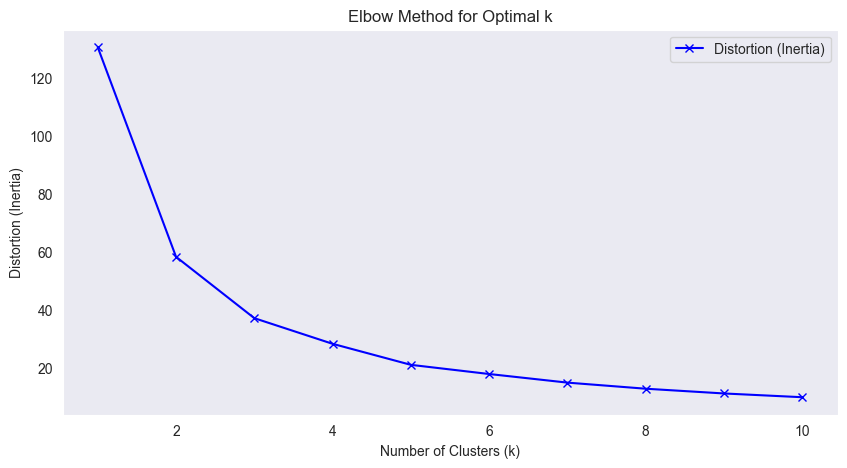

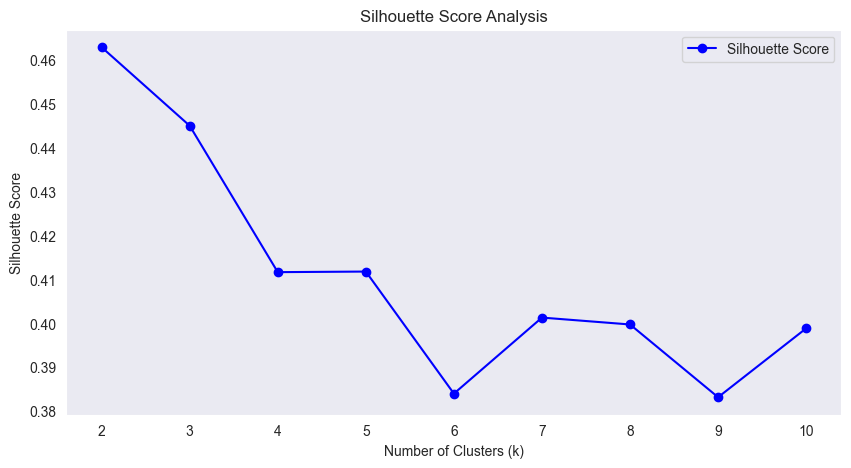

In [7]:
from sklearn.metrics import silhouette_score

# Define range for number of clusters
k_values = range(1, 11)

# List to store the distortion (inertia)
distortions = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)  # Sum of squared distances to the closest centroid
    
    # Compute silhouette score only for k > 1
    if k > 1:
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)  # Silhouette score not defined for k = 1

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(k_values, distortions, 'bx-', label='Distortion (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.legend()
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values[1:], silhouette_scores[1:], 'bo-', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.grid()
plt.legend()
plt.show()


### Trials of Various $eps$ & $min$_$samples$ Values For DBSCAN 

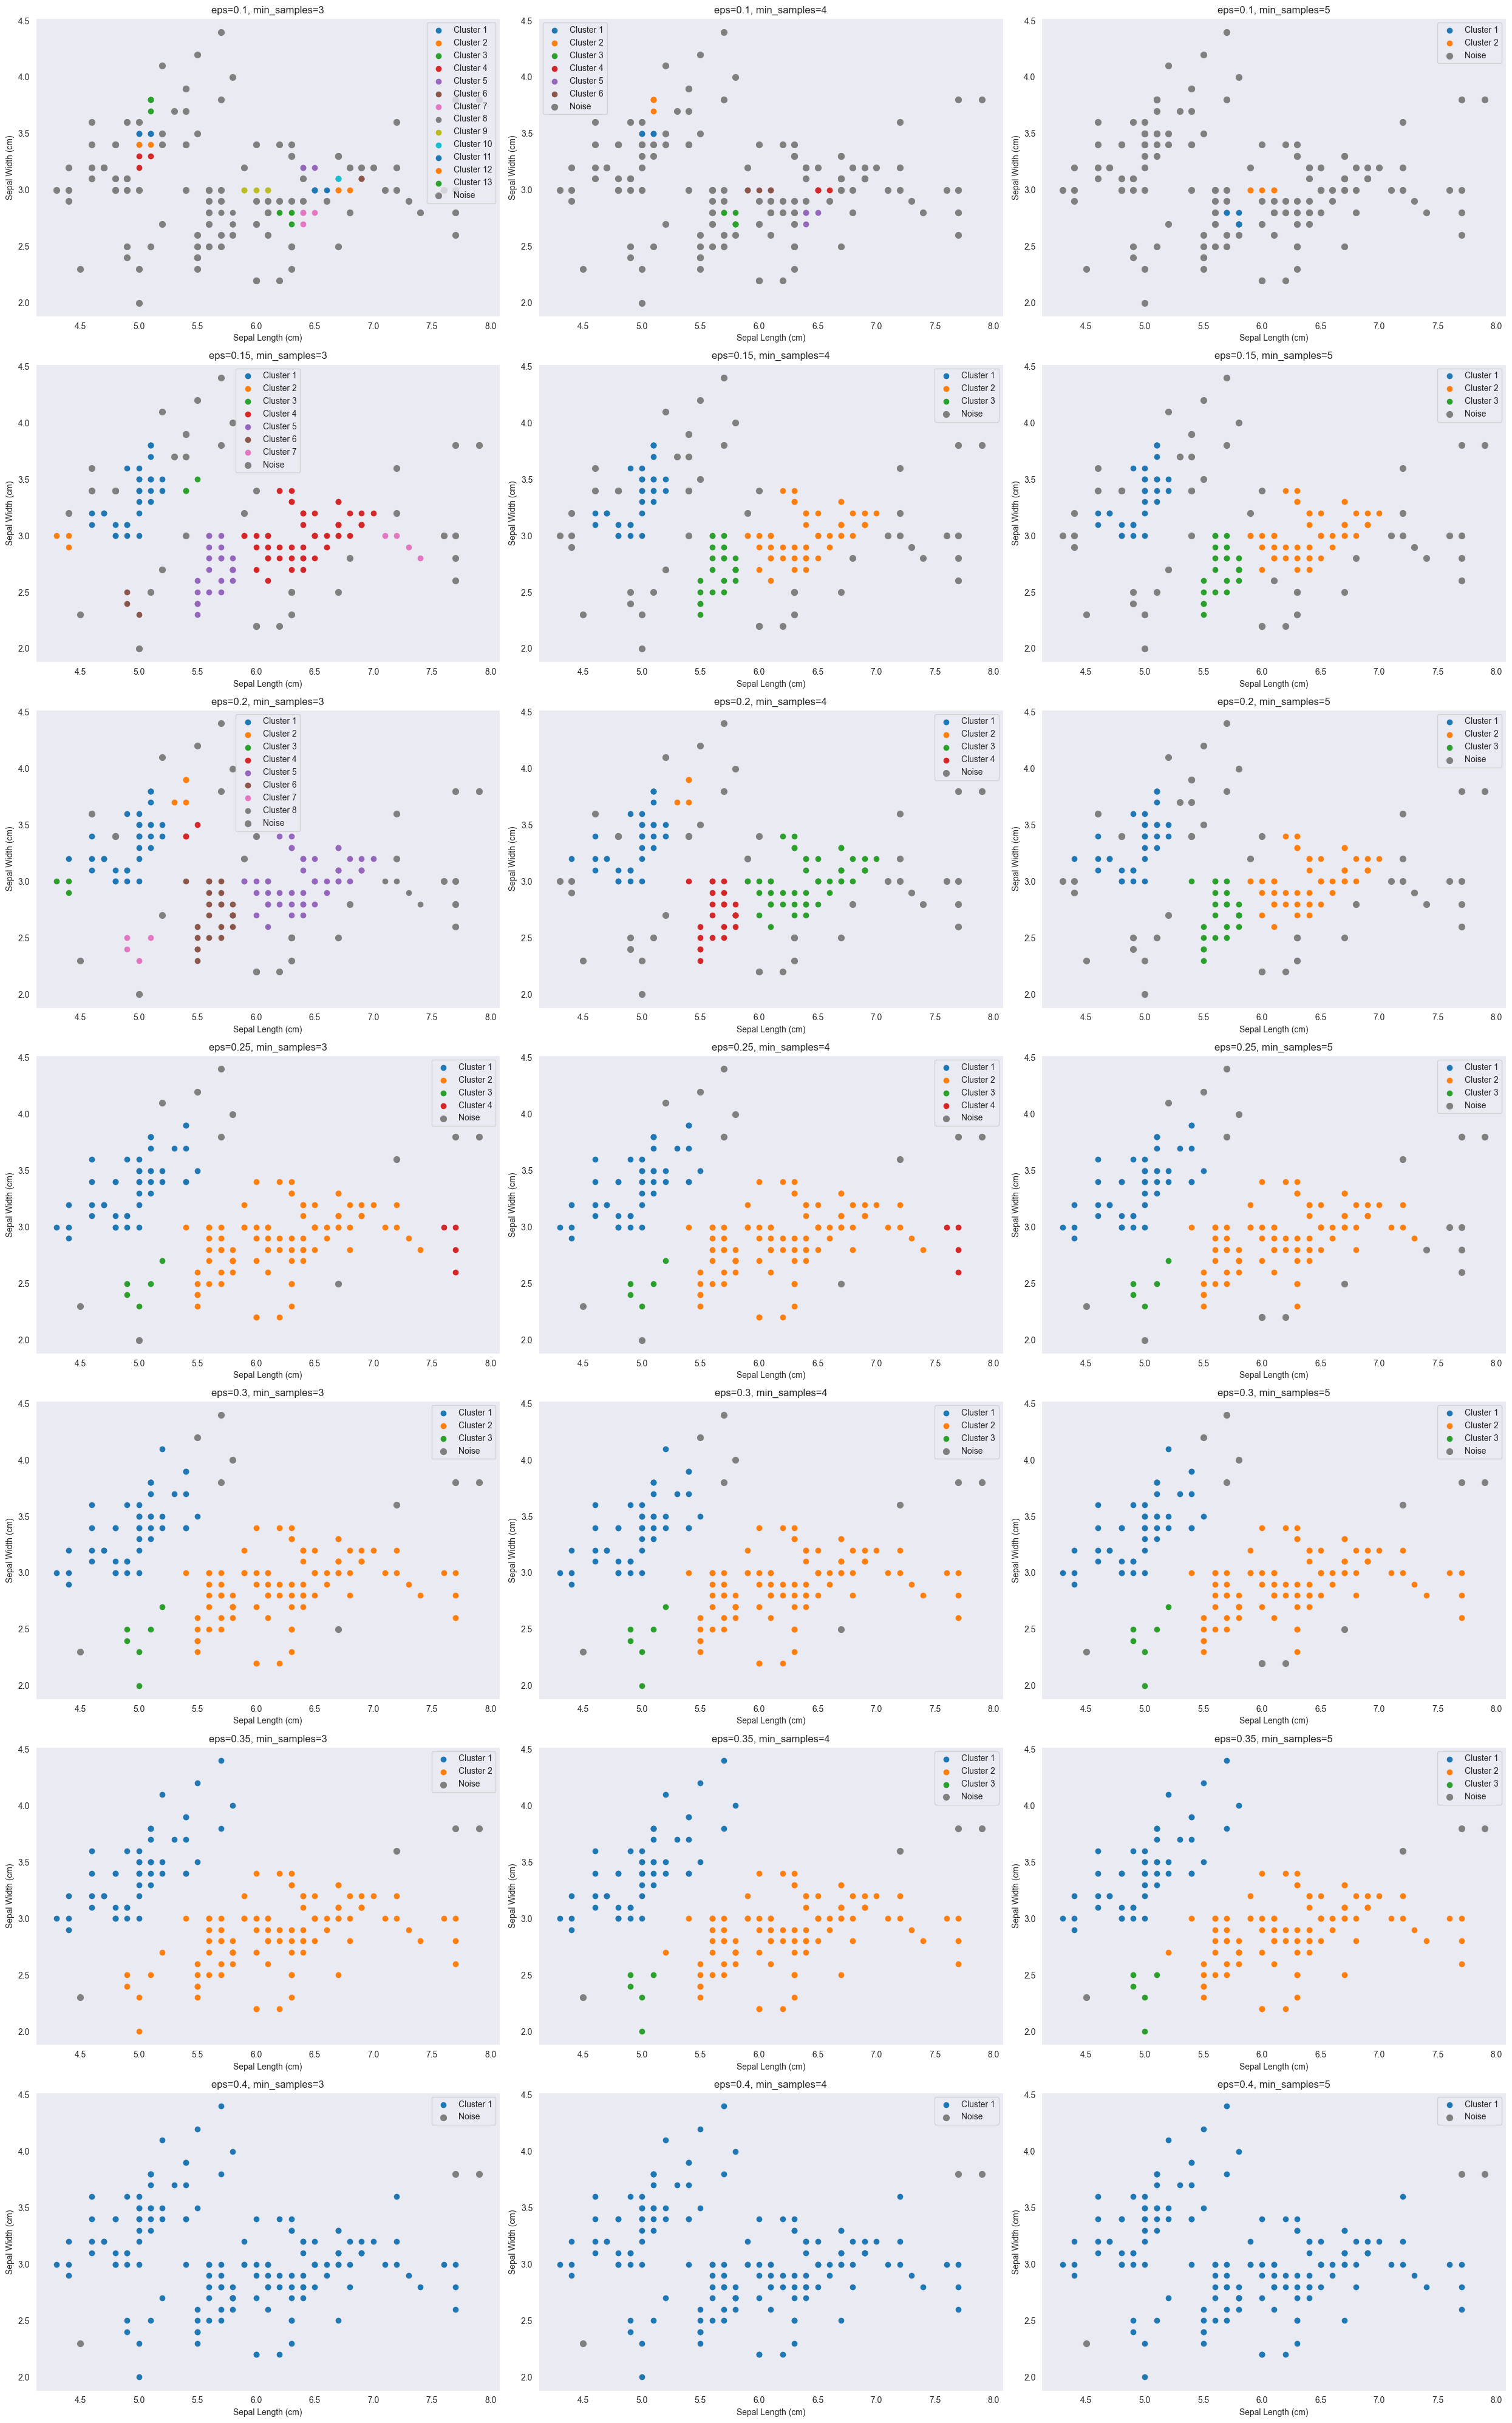

In [8]:
# Set the range of eps and min_samples values
eps_values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
min_samples_values = [3, 4, 5]

# Create a figure with subplots
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(25,40))

# Loop through the values of eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Apply DBSCAN with current eps and min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        unique_labels = set(labels)

        # Select the current axis for plotting
        ax = axes[i, j]
        
        # Plot the clusters on the current subplot
        for label in unique_labels:
            if label == -1:
                ax.scatter(X[labels == label, 0], X[labels == label, 1], c='gray', label='Noise', s=50)
            else:
                ax.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label + 1}')
        
        # Set titles and labels
        ax.set_title(f'eps={eps}, min_samples={min_samples}')
        ax.set_xlabel('Sepal Length (cm)')
        ax.set_ylabel('Sepal Width (cm)')
        ax.legend()
        ax.grid()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### Silhouette Score & Cluster Sizes For Various $eps$ Values

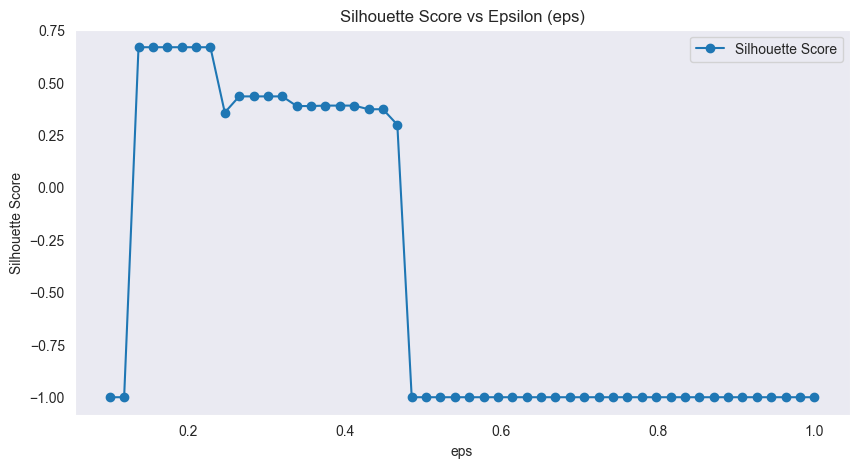

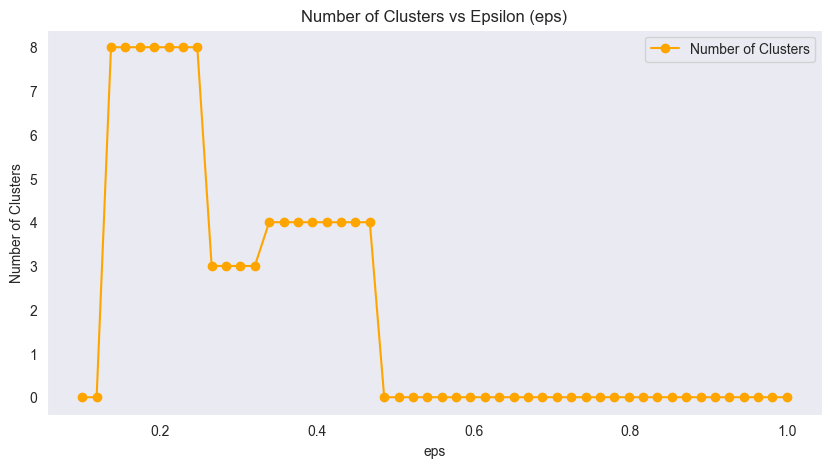

In [9]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaled_X = StandardScaler().fit_transform(X)

# Range of eps values to test
eps_values = np.linspace(0.1, 1.0, 50)

silhouette_scores = []
num_clusters = []

# Test different eps values
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=4)
    labels = dbscan.fit_predict(scaled_X)

    # Filter out noise points (-1)
    if len(set(labels) - {-1}) > 1:
        filtered_labels = labels[labels != -1]
        filtered_X = scaled_X[labels != -1]

        # Compute silhouette score
        sil_score = silhouette_score(filtered_X, filtered_labels)
        silhouette_scores.append(sil_score)
        num_clusters.append(len(set(filtered_labels)))  # Exclude noise (-1)
    else:
        # Assign -1 for silhouette score and cluster count if no valid clusters
        silhouette_scores.append(-1)
        num_clusters.append(0)

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(eps_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score vs Epsilon (eps)')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()

# Plot number of clusters
plt.figure(figsize=(10, 5))
plt.plot(eps_values, num_clusters, marker='o', color='orange', label='Number of Clusters')
plt.title('Number of Clusters vs Epsilon (eps)')
plt.xlabel('eps')
plt.ylabel('Number of Clusters')
plt.legend()
plt.grid()
plt.show()


### KNN Elbow Plot For $min$_$samples$ Estimation

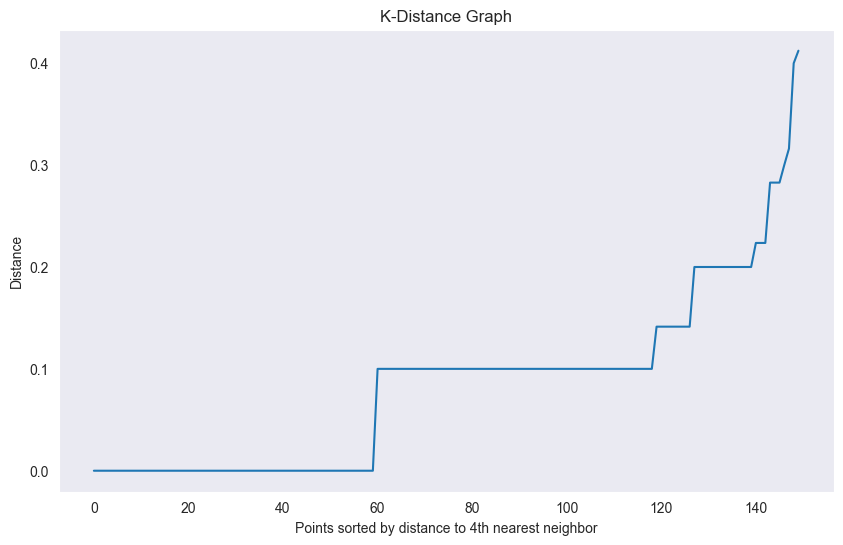

In [10]:
from sklearn.neighbors import NearestNeighbors

#https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

MinPts = 4
neighbors = NearestNeighbors(n_neighbors=MinPts)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances in ascending order
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Use the second column (1st neighbor distance excluded)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Points sorted by distance to {}th nearest neighbor".format(MinPts))
plt.ylabel("Distance")
plt.grid()
plt.show()

K-Means seems to work better as it creates 3 distinct clusters. The Iris dataset is known to have good separation of clusters and 3 distinct species. K Means gives 3 distinct clusters that do not overlap and look similar to other clustering experiments done on this dataset. (e.g. https://www.analyticsvidhya.com/blog/2021/06/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/). 

DBSCAN is not as good as it either has too much noise with a higher number of clusters or just one cluster with minimal noise. We are looking for 3 clusters as there are three species.

DBSCAN's errors were mostly in false negatives, as it categorized many points as noise, whereas K-means' errors were mostly false positives, as it clustered many points that differed with the true cluster.

One advantage of K-means is that it works well in low dimensional spaces. We had 2 features here only. One limitation of K-means is that we need to preselect the number of clusters being generated. This is tricky if we do not have labelled data or the computational overhead to do an elbow method analysis to find the best k value. 

One advantage of DBSCAN is that we do not need to specify the number of clusters for it only the epsilon and minimum samples hyperparameters. However, this is also its limitation. If we do not have a conclusive analysis from K-distance graph and epsilon versus silhouette score, then it may be hard to choose optimal hyperparameters. In this dataset these were straight forward and fast as it is small but for a large dataset this may be computationally heavy.

We will now try to improve the clustering with better preprocessing using normalization and PCA on all four features of the Iris dataset.

### Extra Analysis: Clustering on Iris Dataset Using PCA-Reduced Features

In This section we do both previous clustering methods on the full Iris data that has been pre-processed using principal components analysis to reduce its dimensionality down to 2D space. 

Again there are three clusters that form. Two of the class labels, 
 1. Species 1, Versicolor and
 2. Species 2, Virginica 

are very close together and overlap in almost all clustering that is done. Species 0, Setosa, is always clustered accurately while the other two are harder to distinguish with 2D clustering even with PCA and proper hyperparameter tuning of the unsupervised models.  

In [41]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['species'] = iris.target
iris_df['species_name'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


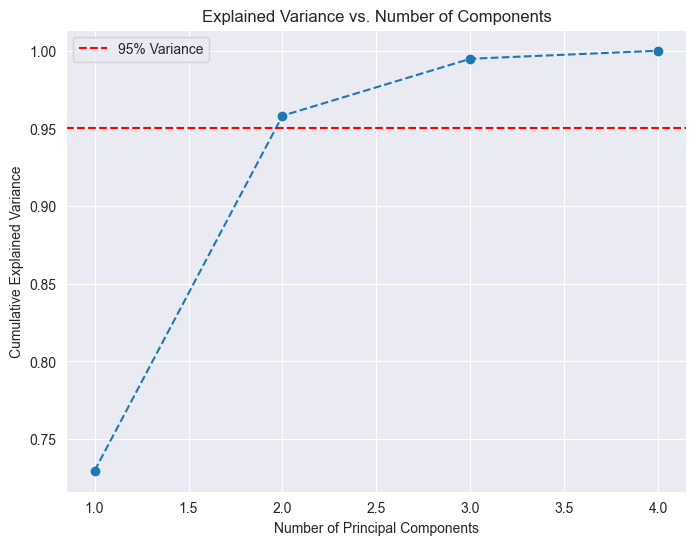

Optimal number of components to retain 95% variance: 2


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# New view of features only
features_list = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
features_df = iris_df[features_list]

# Standardize the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df)

pca = PCA()
pca.fit_transform(X_scaled)

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

# Find the number of components needed for 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {optimal_components}")

In [43]:
# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = iris_df['species']

pca_df

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


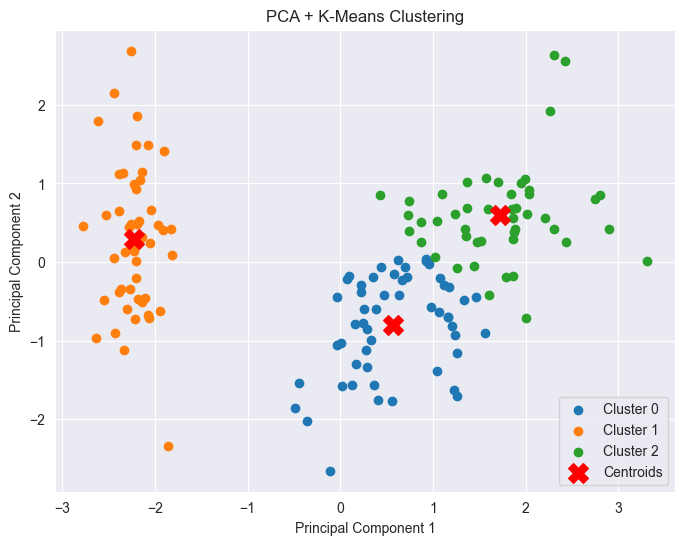

In [44]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++',  max_iter = 100, n_init = 10)
pca_df['cluster'] = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(pca_df[pca_df['cluster'] == cluster]['PC1'],
                pca_df[pca_df['cluster'] == cluster]['PC2'],
                label=f'Cluster {cluster}')

# Overlay actual species for comparison
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + K-Means Clustering')
plt.legend()
plt.show()

In [45]:
# Adjusted Rand Index (comparison with true labels)
ari = adjusted_rand_score(pca_df['species'], pca_df['cluster'])
print(f"Adjusted Rand Index: {ari:.2f}")

# Silhouette Score (clustering cohesion/separation)
silhouette = silhouette_score(X_pca, pca_df['cluster'])
print(f"Silhouette Score: {silhouette:.2f}")

Adjusted Rand Index: 0.62
Silhouette Score: 0.51


PCA Components: 1, Silhouette Score: 0.6754
PCA Components: 2, Silhouette Score: 0.5092
PCA Components: 3, Silhouette Score: 0.4661
PCA Components: 4, Silhouette Score: 0.4599
Number of PCA components tested: 4
Number of silhouette scores computed: 4


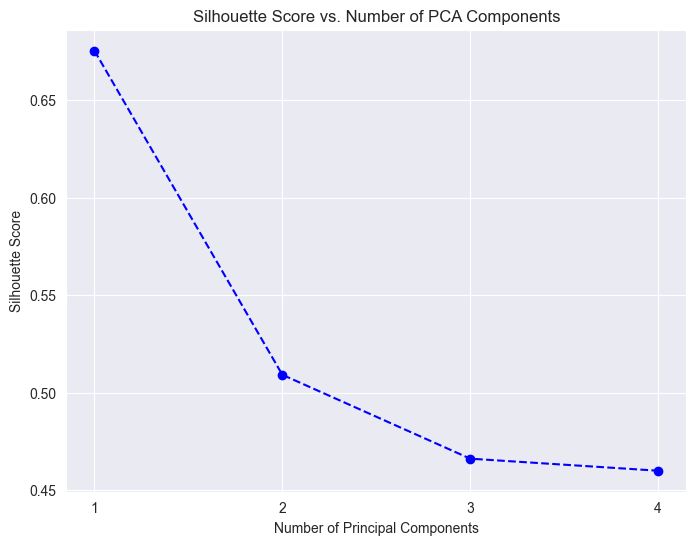

In [46]:
silhouette_scores = []

# Define the range of PCA components to test
max_components = X_scaled.shape[1]  # For Iris, this is 4
components_range = range(1, max_components + 1)

for n_components in components_range:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Apply K-Means Clustering
    kmeans = KMeans(n_clusters=3, init='k-means++',  max_iter = 100, n_init = 10)
    clusters = kmeans.fit_predict(X_pca)
    
    # Compute Silhouette Score
    score = silhouette_score(X_pca, clusters)
    silhouette_scores.append(score)
    print(f"PCA Components: {n_components}, Silhouette Score: {score:.4f}")

# Verify lengths
print(f"Number of PCA components tested: {len(components_range)}")
print(f"Number of silhouette scores computed: {len(silhouette_scores)}")

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(components_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of PCA Components')
plt.xticks(components_range)  # Ensure x-axis has integer ticks
plt.grid(True)
plt.show()

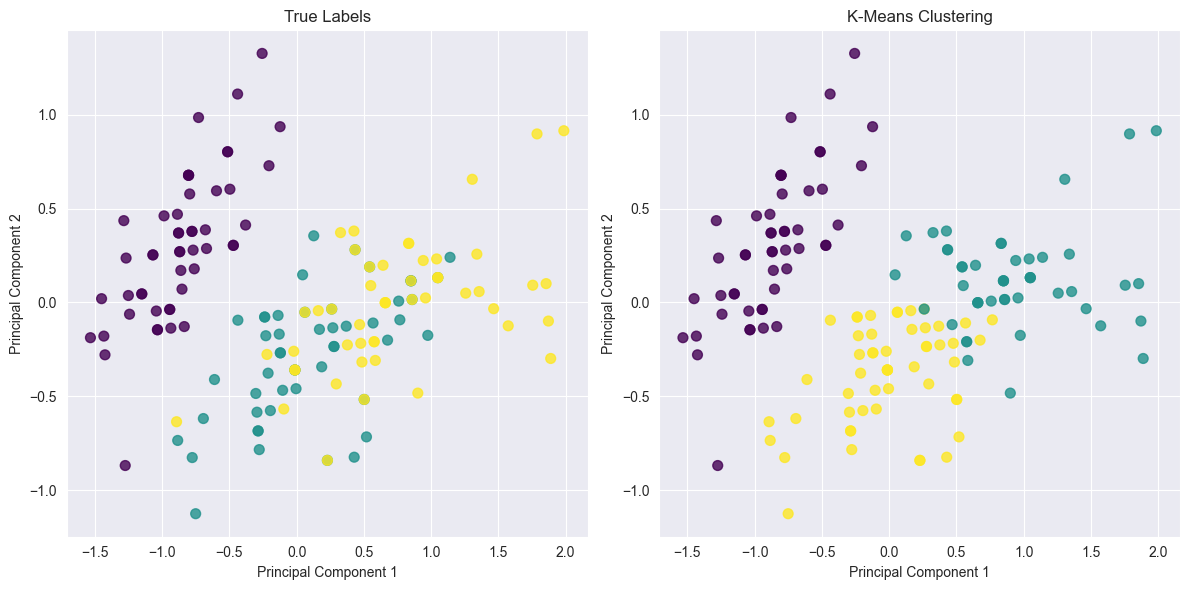

In [53]:
# True vs Cluster labels scatter plot
plt.figure(figsize=(12, 6))

# Plot true labels
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis', s=50, alpha=0.8)
plt.title('True Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.8)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

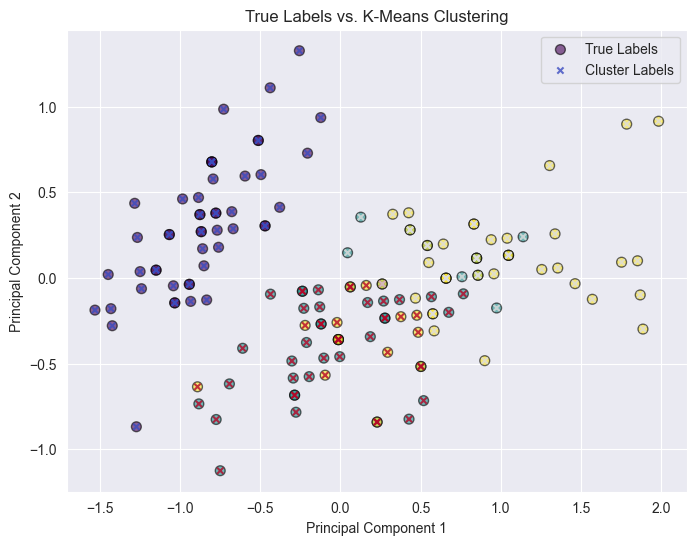

In [54]:
# Superimposed scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis', s=50, label='True Labels', alpha=0.6, edgecolor='k')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='coolwarm', s=20, label='Cluster Labels', alpha=0.8, marker='x')

plt.title('True Labels vs. K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.show()

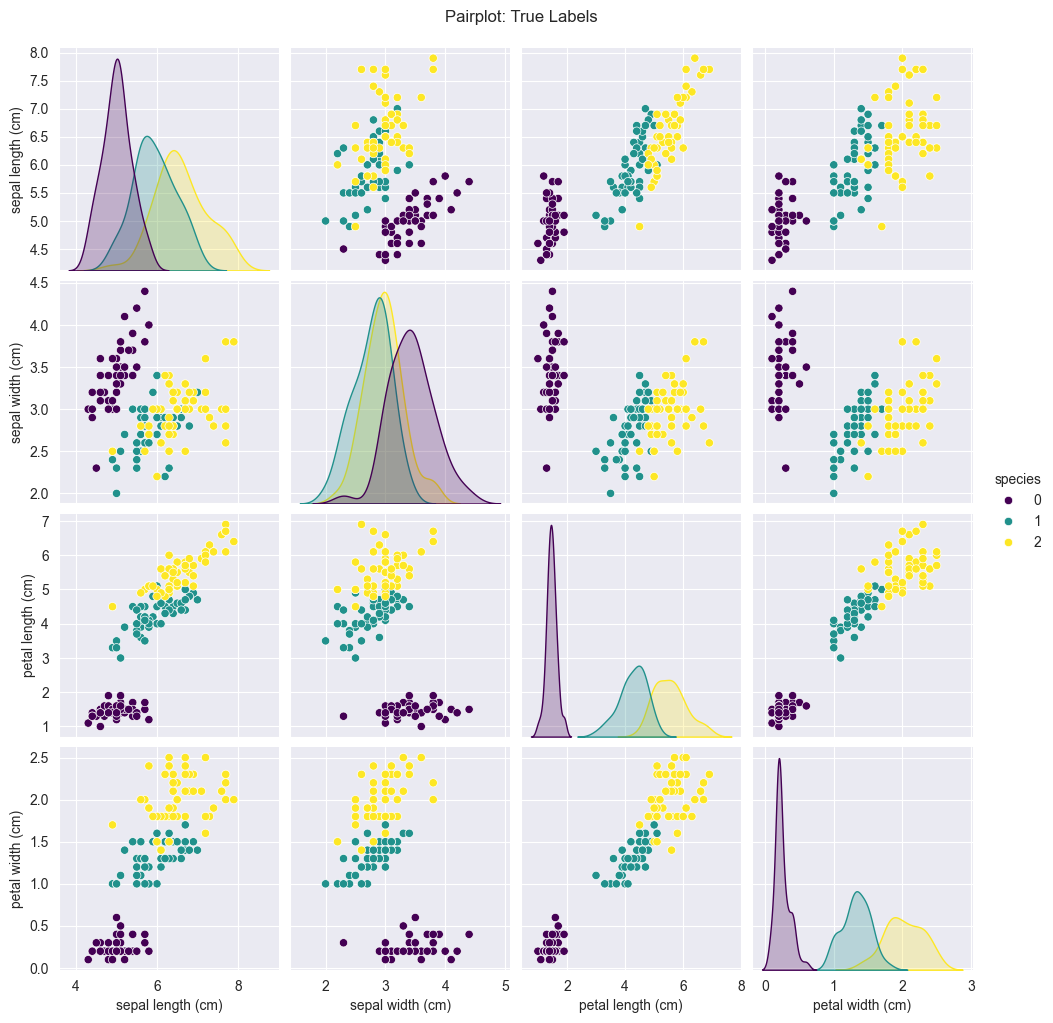

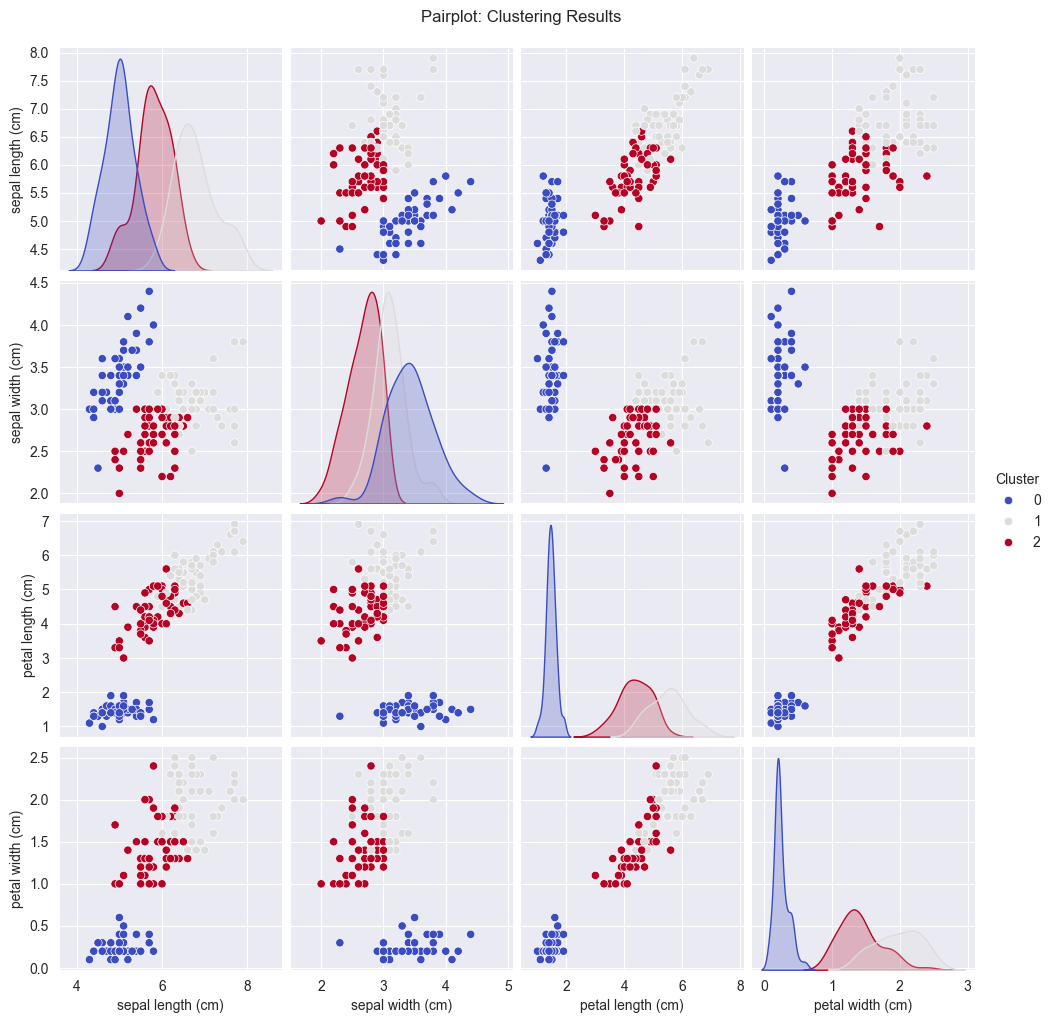

In [55]:
import seaborn as sns

iris_df['Cluster'] = clusters
sns.pairplot(iris_df, hue='species', vars=features_list, palette='viridis')
plt.suptitle('Pairplot: True Labels', y=1.02)

sns.pairplot(iris_df, hue='Cluster', vars=features_list, palette='coolwarm')
plt.suptitle('Pairplot: Clustering Results', y=1.02)
plt.show()

### DBSCAN On PCA Reduced Iris Data

TypeError: 'NoneType' object is not iterable

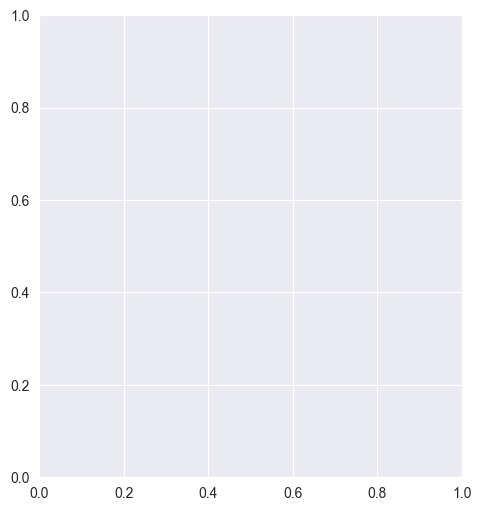

In [56]:
# Define a function to find the best eps and min_samples
def dbscan_grid_search(X_pca, eps_values, min_samples_values):
    best_score = -1
    best_eps = None
    best_min_samples = None
    best_labels = None
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Apply DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan_labels = dbscan.fit_predict(X_pca)
            
            # Only compute silhouette score for valid clusters (not noise)
            if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):  # Valid clusters
                score = silhouette_score(X_pca, dbscan_labels)
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_labels = dbscan_labels
    
    return best_eps, best_min_samples, best_labels

# Define eps and min_samples values to try
eps_values = np.arange(0.1, 2.0, 0.1)
min_samples_values = range(3, 15)

# Find the best eps and min_samples
best_eps, best_min_samples, best_labels = dbscan_grid_search(X_pca, eps_values, min_samples_values)

# Plot the results of the best DBSCAN clustering
plt.figure(figsize=(12, 6))

# Plot for DBSCAN clustering results with optimal parameters
plt.subplot(1, 2, 1)
unique_labels = set(best_labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(X_pca[best_labels == label, 0], X_pca[best_labels == label, 1], c='gray', label='Noise', s=50)
    else:
        plt.scatter(X_pca[best_labels == label, 0], X_pca[best_labels == label, 1], label=f'Cluster {label}')
plt.title(f"DBSCAN Clustering Results (eps={best_eps}, min_samples={best_min_samples})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()

# Plot for true labels (for comparison)
plt.subplot(1, 2, 2)
for label in set(Y):
    plt.scatter(X_pca[Y == label, 0], X_pca[Y == label, 1], label=f'True Label {label + 1}')
plt.title("True Labels (PCA Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}")

In conclusion, both DBSCAN and KMeans are decent options to cluster the data and show slightly different approaches to 2D representations of the Iris Dataset. With proper selection of hyperparameter values for both clustering algorithms accurate clusters can be generated. However, K means with K = 3 seems to show the closest representation to the original labelled data when done with 2D representations of the Iris dataset.

<h1><center>Conceptual Questions (5 Marks)</center></h1>

### Question 1 (3 Marks):
1. Explain the Elbow Method for determining the number of clusters in K-Means.
2. Suppose you applied K-Means clustering to a dataset and plotted the SSE for cluster counts
1 through 10. You observe a significant "elbow" at K=4. What does this suggest about the
dataset? Why?

The Elbow Method is a popular technique for selecting the optimal number of clusters K in K-Means clustering. The goal is to find the value of KK where the cost of adding more clusters (i.e., the sum of squared distances between points and their assigned centroids) starts to decrease at a slower rate, forming an "elbow" in the plot.

To perform the elbow method, K-means must be run over several k values. For each k value the sum of squares error (SSE) must be calculated. The formula is given below:

$$
SSE = \sum_{i=1}^{n} (x_i - \hat{x}_i)^2
$$

Where:
- $n$ is the number of points in the cluster,
- $x_i$ is the observed data point,
- $\hat{x}_i$ is the predicted value or centroid for that data point.

Sometimes this is shown as the within cluster sum of squares error (WCSS) which is just a summation over all clusters after getting the SSE for a particular cluster. The formula is shown below:

$$
WCSS = \sum_{k=1}^{K} \sum_{i=1}^{n_k} (x_i - \mu_k)^2
$$

Where:
- $K$ is the number of clusters,
- $n_k$ is the number of points in the $k$-th cluster,
- $x_i$ is the data point in the cluster,
- $\mu_k$ is the centroid of the $k$-th cluster.

These WCSS/SSE values are plotted on a y-axis against an x-axis of K values. On this plot we look for a literal elbow point (point of inflection) and select that as the optimal number of clusters as beyond this point there is a minimal reduction of SSE, such that the clusters do not really improve. This was done in detail in the coding part of the assignment when comparing K-means with DBSCAN. It showed that 3 clusters were optimal for the iris dataset.

If an elbow method plot showed an elbow at $K=4$, then this means four clusters are the optimal number for the dataset as beyond four clusters there are no true improvements in SSE and the clustering does not improve in its accuracy on the dataset.

### Question 2 (3 Marks):
1. Refer to the dendrogram below (Hierarchical Clustering – Complete Linkage). How many
clusters are formed if the dendrogram is cut at a distance of 0.6? (1.5 points)

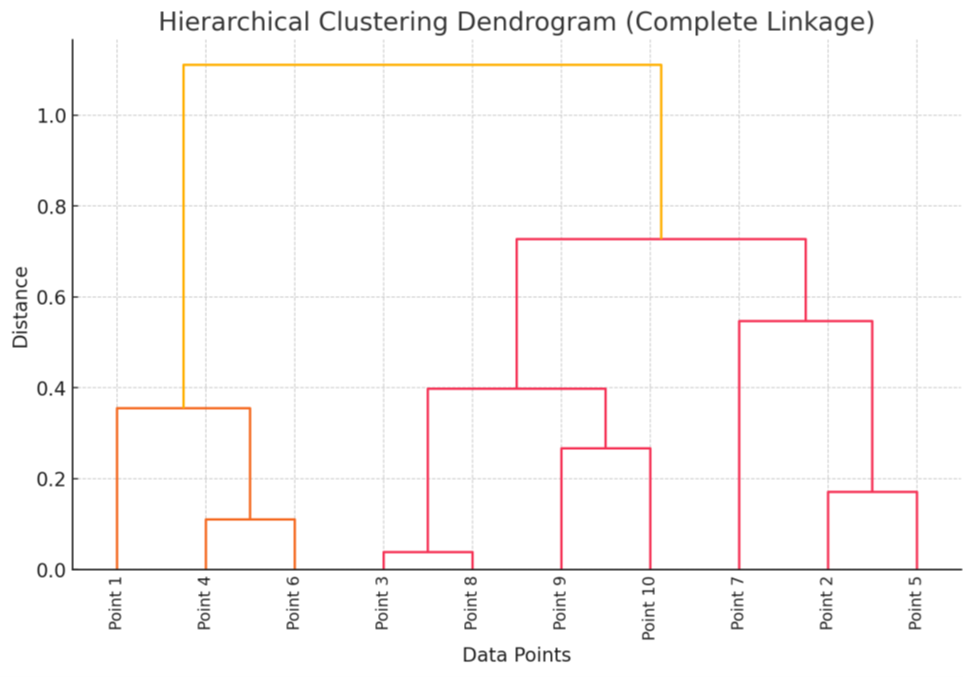

In [21]:
from IPython.display import Image, display
display(Image(filename='Dendogram.png'))

If the dendogram was cut at a distance of 0.6, **three** clusters would be formed. One cluster would contain points 1, 4, and 6, the second cluster would contain points 3, 8, 9, and 10, and the third cluster would contain points 7, 2, and 5.

2. Explain how the choice of linkage method (e.g., single, complete, average) affects the
results (compare the 3 methods in terms of two aspects, e.g., cluster shape, sensitivity to
noise, etc.). (1.5 points)

One difference between the linkage methods is the size and quality of the clusters. Since complete linkage measures distance between clusters as the maximum distance of points in the clusters, it minimizes the size increase of clusters every iteration. This optimizes global proximity and leads to smaller and higher quality clusters that accurately reflect the true partitions. However, if the true partitions are sparse and/or irregular, complete linkage produces meaningless clusters. Since single linkage uses the minimum distances between cluster points, it tends to merge and increase clusters more aggressively and cause larger clusters that optimize for local proximity, which makes it important to carefully choose parameters like the threshold distance between clusters. Average linkage is a medium of the two methods, increasing clusters less aggressively than single linkage, but more aggressively than complete linkage.

Another difference is sensitivity to noise and outliers. Single and complete linkage are both sensitive to noise because they are represented by points in the cluster, some of which may be outliers. Average linkage is more robust with outlier sensitivity because the average distance will smooth out the effects of the outliers on the distance.